<a href="https://colab.research.google.com/github/Consmart18/On-time-Graduation---Saudi/blob/main/on_time_graduation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load the data
student_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Eman/FINAL_DATASET_KSU.csv')

##Generate Data Profile

In [ ]:
pip install -U ydata-profiling

In [ ]:
import sys
!{sys.executable} -m pip install -U ydata-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension

In [ ]:
import pandas as pd
from ydata_profiling import ProfileReport

profile = ProfileReport(student_df, title="Profiling Report")

In [ ]:
# Save the report as an HTML file
profile.to_file("Profile_for_KSU_data.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
column_names = student_df.columns
print(column_names)

Index(['Degree', 'Headquarters code', 'College code', 'College',
       'Department Name', 'Specialization', 'Plan type', 'Version',
       'Certified?', 'Degree awarded?', 'Are there any courses in the plan?',
       'Enrollment semester', 'Graduation semester', 'Sex',
       'General situation', 'Nationality', 'GPA', 'Appreciation', 'Plan hours',
       'remaining hours', 'success hours',
       'Hours registered in the last semester',
       'Specialization admission semester', 'Secondary branch',
       'High School Average', 'General Aptitude Test',
       'Standard achievement admission test', 'Date of acceptance Hijri',
       'Date of acceptance AD', 'Student's level', 'First year average',
       'Enrollment semester-3', 'Duration of study-plan',
       'Length of study-student', 'Do you graduate on time?'],
      dtype='object')


## Data Preprocessing

In [3]:
# Renaming columns
student_df = student_df.rename(columns={
    'Sex': 'Gender',
    'Secondary branch': 'High school branch',
    'Department Name': 'Department',
    'Do you graduate on time?': 'Graduate on time?',
    'Hours registered in the last semester': 'Hrs registered in last semester',
    'First year average': 'First year GPA'
})

In [4]:
# Dropping specified columns
columns_to_drop = ['Degree', 'Certified?', 'Degree Awarded?', 'Are there any courses in the plan?', 'General situation']
student_df = student_df.drop(columns=columns_to_drop, errors='ignore')


In [5]:
student_df = student_df.dropna()


In [6]:
# Count of each class in the target variable
class_counts = student_df['Graduate on time?'].value_counts()

# Print class counts
print(class_counts)

# Calculate and print class distribution in percentage
class_distribution = student_df['Graduate on time?'].value_counts(normalize=True) * 100
print(class_distribution)

False    3016
True     2870
Name: Graduate on time?, dtype: int64
False    51.240231
True     48.759769
Name: Graduate on time?, dtype: float64


In [7]:
# Correcting the binary encoding for Gender
student_df['Gender'] = student_df['Gender'].apply(lambda x: 1 if x.lower() == 'male' else 0)

# Correcting the binary encoding for Graduate on time?
student_df['Graduate on time?'] = student_df['Graduate on time?'].apply(lambda x: 1 if x == True else 0)

## Get working dataset here

In [8]:
column_names = student_df.columns
print(column_names)

Index(['Headquarters code', 'College code', 'College', 'Department',
       'Specialization', 'Plan type', 'Version', 'Degree awarded?',
       'Enrollment semester', 'Graduation semester', 'Gender', 'Nationality',
       'GPA', 'Appreciation', 'Plan hours', 'remaining hours', 'success hours',
       'Hrs registered in last semester', 'Specialization admission semester',
       'High school branch', 'High School Average', 'General Aptitude Test',
       'Standard achievement admission test', 'Date of acceptance Hijri',
       'Date of acceptance AD', 'Student's level', 'First year GPA',
       'Enrollment semester-3', 'Duration of study-plan',
       'Length of study-student', 'Graduate on time?'],
      dtype='object')


In [9]:
selected_columns = ['Gender', 'Plan hours', 'Department', 'High school branch', 'High School Average',
                    'General Aptitude Test', 'Standard achievement admission test', 'First year GPA',
                    'Hrs registered in last semester', 'Duration of study-plan', 'Graduate on time?']

# Create the working dataset with the updated columns
working_data = student_df[selected_columns]

# Verify the dataset
working_data.head(5)


Gender  Plan hours              Department High school branch  \
0       0         136  Plant and microbiology         scientific   
1       0         136  Plant and microbiology         scientific   
2       0         136  Plant and microbiology         scientific   
3       0         136  Plant and microbiology         scientific   
4       0         136  Plant and microbiology         scientific   

   High School Average  General Aptitude Test  \
0                99.15                   70.0   
1                96.48                   78.0   
2                96.03                   60.0   
3                97.23                   76.0   
4                98.80                   74.0   

   Standard achievement admission test  First year GPA  \
0                                 77.0            4.39   
1                                 74.0            4.07   
2                                 61.0            2.72   
3                                 71.0            3.98   
4                                 71.0            3.57   

   Hrs registered in last semester Duration of study-plan  Graduate on time?  
0                               13                      8                  0  
1                                9                      8                  0  
2                                4                      8                  0  
3                               20                      8                  1  
4                               13                      8                  0

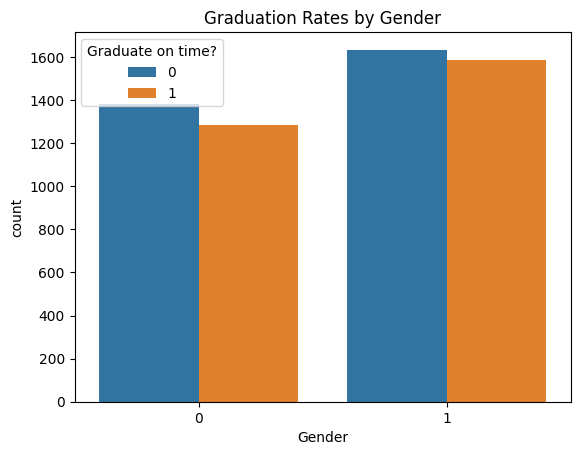

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar chart comparing graduation rates between genders
sns.countplot(data=working_data, x='Gender', hue='Graduate on time?')
plt.title('Graduation Rates by Gender')
plt.show()

In [11]:
# Make a deep copy of working_data
encoded_data = working_data.copy()

# One-hot encoding High school branch on the copied dataframe
encoded_data = pd.get_dummies(encoded_data, columns=['High school branch'], prefix=['HS_branch'])

# Department Encoding on the copied dataframe
encoded_data = pd.get_dummies(encoded_data, columns=['Department'], prefix=['Dept'])


In [12]:
encoded_data.head(5)

Gender  Plan hours  High School Average  General Aptitude Test  \
0       0         136                99.15                   70.0   
1       0         136                96.48                   78.0   
2       0         136                96.03                   60.0   
3       0         136                97.23                   76.0   
4       0         136                98.80                   74.0   

   Standard achievement admission test  First year GPA  \
0                                 77.0            4.39   
1                                 74.0            4.07   
2                                 61.0            2.72   
3                                 71.0            3.98   
4                                 71.0            3.57   

   Hrs registered in last semester Duration of study-plan  Graduate on time?  \
0                               13                      8                  0   
1                                9                      8                  0   
2                                4                      8                  0   
3                               20                      8                  1   
4                               13                      8                  0   

   HS_branch_Al Noor Institutes  ...  Dept_community Health  \
0                             0  ...                      0   
1                             0  ...                      0   
2                             0  ...                      0   
3                             0  ...                      0   
4                             0  ...                      0   

   Dept_english language  Dept_information Science  \
0                      0                         0   
1                      0                         0   
2                      0                         0   
3                      0                         0   
4                      0                         0   

   Dept_information technology  Dept_mathematics  Dept_mechanical engineering  \
0                            0                 0                            0   
1                            0                 0                            0   
2                            0                 0                            0   
3                            0                 0                            0   
4                            0                 0                            0   

   Dept_media  Dept_psychology  Dept_the date  Dept_undefined  
0           0                0              0               0  
1           0                0              0               0  
2           0                0              0               0  
3           0                0              0               0  
4           0                0              0               0  

[5 rows x 78 columns]

In [13]:
# Reordering columns to place 'Graduate on time?' last
cols = [col for col in encoded_data if col != 'Graduate on time?'] + ['Graduate on time?']
encoded_data = encoded_data[cols]


In [14]:
# Dropping rows where 'Duration of study-plan' has a value of '?'
encoded_data = encoded_data[encoded_data['Duration of study-plan'] != '?']

In [15]:
num_instances, _ = encoded_data.shape
print(f"There are {num_instances} instances in the 'encoded_data' DataFrame.")


There are 5883 instances in the 'encoded_data' DataFrame.


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Splitting the data into train and test sets
X = encoded_data.drop('Graduate on time?', axis=1)
y = encoded_data['Graduate on time?']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Building the Random Forest model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Making predictions
y_pred = rf_classifier.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred))

Accuracy: 81.70%
              precision    recall  f1-score   support

           0       0.83      0.80      0.82       894
           1       0.80      0.83      0.82       871

    accuracy                           0.82      1765
   macro avg       0.82      0.82      0.82      1765
weighted avg       0.82      0.82      0.82      1765



## Explainability

In [ ]:
pip install numba shap

In [ ]:
import shap

In [ ]:
def globalisation(the_model):
    # Using TreeExplainer for RandomForest
    explainer = shap.TreeExplainer(the_model)
    shap_values = explainer.shap_values(X_test)

    # plot the global feature importance
    shap.summary_plot(shap_values, X_test)

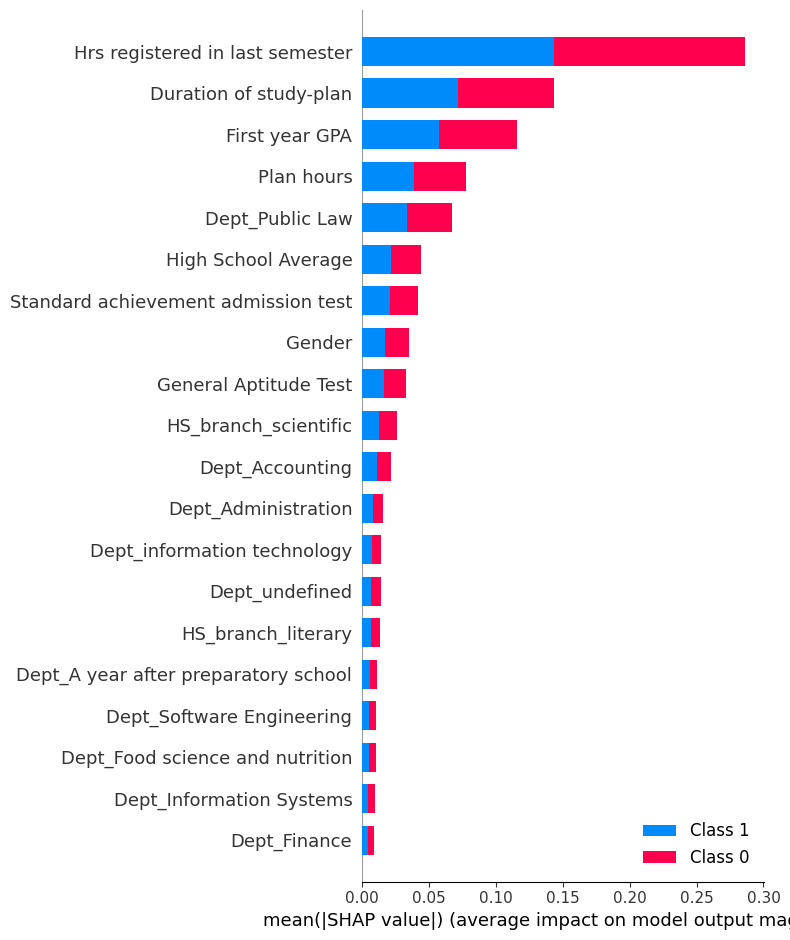

In [ ]:
globalisation(rf_classifier)

In [19]:
X_train['Duration of study-plan'] = pd.to_numeric(X_train['Duration of study-plan'], errors='coerce')
X_test['Duration of study-plan'] = pd.to_numeric(X_test['Duration of study-plan'], errors='coerce')

X_train['Duration of study-plan'].fillna(X_train['Duration of study-plan'].mean(), inplace=True)
X_test['Duration of study-plan'].fillna(X_train['Duration of study-plan'].mean(), inplace=True)

In [ ]:
pip install lime

In [97]:
import lime

In [28]:
from lime.lime_tabular import LimeTabularExplainer

# Create a LIME explainer
explainer = LimeTabularExplainer(X_train.values,
                                 feature_names=X_train.columns,
                                 class_names=['False', 'True'], # Assume binary classification: Fail, Pass
                                 discretize_continuous=True)

# Explaining the prediction for the first instance in the test set:
exp = explainer.explain_instance(X_test.iloc[874].values, rf_classifier.predict_proba, num_features=15)
exp.show_in_notebook(show_all=False)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [29]:
# Explaining the prediction for the first instance in the test set:
exp = explainer.explain_instance(X_test.iloc[900].values, rf_classifier.predict_proba, num_features=15)
exp.show_in_notebook(show_all=False)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
